# Spring 2025 ENVECON/IAS 118 - Introductory Applied Econometrics Problem Set 2
## Due on Gradescope, Midnight February 23

# Submission Instructions 

Go to the file dropdown menu and select the ”Save and export notebook as” dropdown menu. In this menu make sure to select ”PDF”, "Webpdf" or "PDF via Chrome" (if that option appears instead). 

The figures in the problem statement may not show up in the pdf you generate. Once you have downloaded this pdf, make sure it shows all your answers and upload it to Gradescope: https://www.gradescope.com/courses/927499

-----------------------------------------

## Question 1: What factors affect the demand for fish in the New York fresh fish market?

This question is an adapted case from a paper published in the Journal of Economic Perspectives (JEP, 2006) titled ''Markets: The Fulton Fish Market,'' by Kathryn Graddy. Full citation: 
Journal of Economic Perspectives, vol. 20, no. 2, Spring 2006 (pp. 207–220).

Graddy uses price and quantity data to estimate fish demand in the New York fish market.  (But you do not need to read the paper to complete the problem set): 

In this problem set, we study the demand for fish for different days of the week in the New York Fish Market using a sample of 111 daily observations.

## Data Description
The data for this exercise come from daily fish quantity sold and price data. The data also has a column identifying which day of the week the observation pertains to, that is, if it is for a Monday, Tuesday, ..., or Friday. It also identifies weather variables for each daily observation.

The variables included in the `fishData.dta` that are required for this question are:

• `date`  a numeric variable identifying a date

• `day1` : dummy equal to 1 if it is a Monday, 0 otherwise

• `day2` : dummy equal to 1 if it is a Tuesday, 0 otherwise

• `day3` : dummy equal to 1 if it is a Wednesday, 0 otherwise

• `day4` : dummy equal to 1 if it is a Thursday, 0 otherwise

• `day5` : dummy equal to 1 if it is a Friday, 0 otherwise

• `p`: price of fish in dollars per pound

• `q`: quantity sold in pounds

• `rainy`: dummy equal to 1 if it is a rainy day, 0 otherwise

• `cold`: dummy equal to 1 if it is a cold day, 0 otherwise

• `stormy`: dummy equal to 1 if it is stormy at see for fishermen that day, 0 otherwise

• `windspeed`: wind speed in knots


## Question 1 : Descriptive Statistics

Load the dataset `fishdata.dta`. Notice that this is a `.dta` file so you will need to use the `haven` package. Use the `head()` function to have a look at the dataset.

In [43]:
library(haven)
# Read in data
mydata <- read_dta("fishData.dta")
head(mydata)

date,day1,day2,day3,day4,day5,p,q,rainy,cold,stormy,windspeed
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
911202,1,0,0,0,0,0.6500000,8058.003,1,0,1,20.00000
911203,0,1,0,0,0,1.0000000,2224.001,0,0,1,20.00000
911204,0,0,1,0,0,1.0750000,4231.001,1,1,0,16.66667
911205,0,0,0,1,0,1.2803571,5749.998,0,1,1,20.83333
911206,0,0,0,0,1,1.9431819,2551.001,0,1,1,20.83333
911209,1,0,0,0,0,0.8134146,10951.998,0,0,0,15.83333


### a) Create log of price and log of q Variables
Please create the log of q and the log of p and add them to the dataframe.

In [44]:
# Intalling tidyverse (optional)
library(tidyverse)

In [45]:
# Create log-transformed p and q variables
mydata$log_p <- log(mydata$p)
mydata$log_q <- log(mydata$q)

# Create log-transformed p and q variables (tidyverse)
# mydata <- mydata %>% mutate(log_p = log(p), log_q = log(q))

### b) Descriptive statistics

#### i) Weather characteristic

How many days are in your data? How many days are rainy days, and how many are not rainy days? 


In [46]:
# Check if there are NAs (optional)
na_count <- sum(is.na(mydata))

# Days in the data
n_total <- nrow(mydata)

# Count rainy days
n_rainy <- sum(mydata$rainy)

# Count non-rainy days
n_non_rainy <- nrow(mydata) - sum(mydata$rainy)

# Print results
c(na_count, n_total, n_rainy, n_non_rainy)

## Alternative coding answers
print(paste("There are", nrow(mydata), "observations in the data set."))

rainy_data <- filter(mydata, rainy == 1)

print(paste("There are", nrow(rainy_data), 
    "rainy days in the dataset and", 
    nrow(mydata) - nrow(rainy_data), 
    "non rainy days in the dataset"))

[1]   0 111  18  93

[1] "There are 111 observations in the data set."
[1] "There are 18 rainy days in the dataset and 93 non rainy days in the dataset"


**Answer:**
There are 111 days in our data, of which 18 are rainy and 93 are non-rainy.


#### ii) What is the mean price on rainy days? 

Hint: check for the `mean()` syntax in this website: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/mean .

In [47]:
# Mean of rainy days
rainy_data <- filter(mydata, rainy == 1)
p_mean_rainy <- mean(rainy_data$p)

# Print results
p_mean_rainy

[1] 0.8959725

**Answer:** The mean price on rainy days is 0.89 dollars per pound.

#### iii) Measures of dispersion

Compute the standard deviation of the q and p variables.

You can use canned functions for the standard deviations.

In [48]:
# Standard deviations
q_sd <- sd(mydata$q)
p_sd <- sd(mydata$p)

# Print results
c(q_sd, p_sd)

[1] 4040.1194341    0.3351127

**Answer:** The quantity sold has a standard deviation of 4040.12 pounds and the price of fish has a standard deviation of 0.34 dollars per pound.

### b) Histogram for q

#### i) Plot a histogram (Hint: use the `hist()` command) of q, with 10 bins.

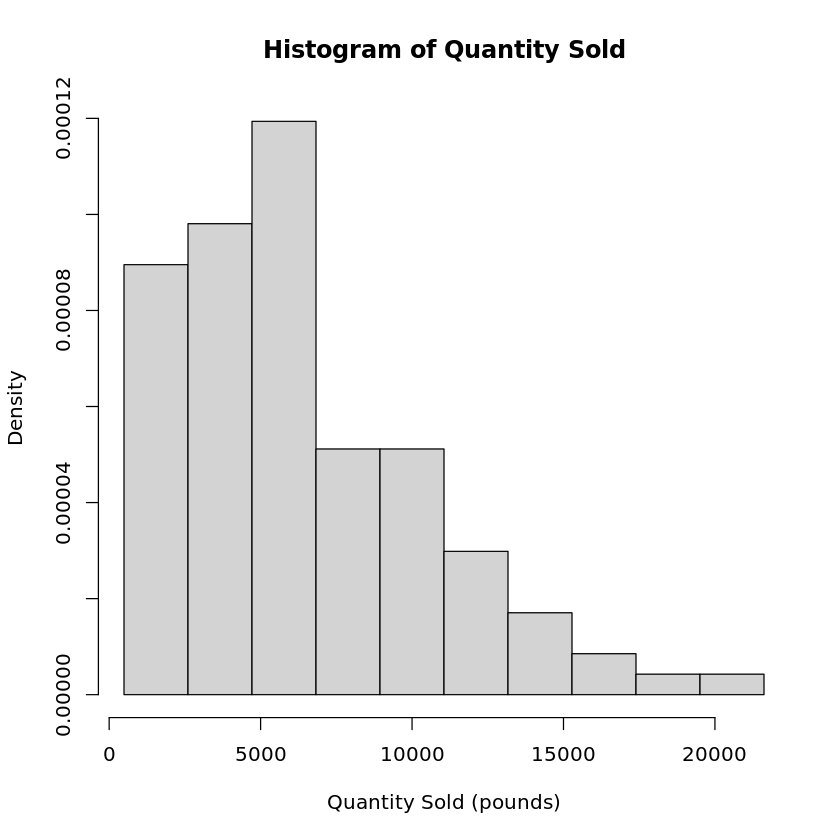

In [49]:
# As long as we have 10 bins, I think it should be fine
# Different packages have different ways of handling the bin starting point

# Using hist
hist(mydata$q,
     breaks = seq(min(mydata$q), max(mydata$q), l = 10 + 1),
     main = 'Histogram of Quantity Sold',
     xlab = 'Quantity Sold (pounds)',
     freq = FALSE) # Optional

#### ii) In the same graph, plot the histogram for q in red for rainy days and in blue for non rainy days

What do you conclude when comparing the histogram for rainy and non rainy days

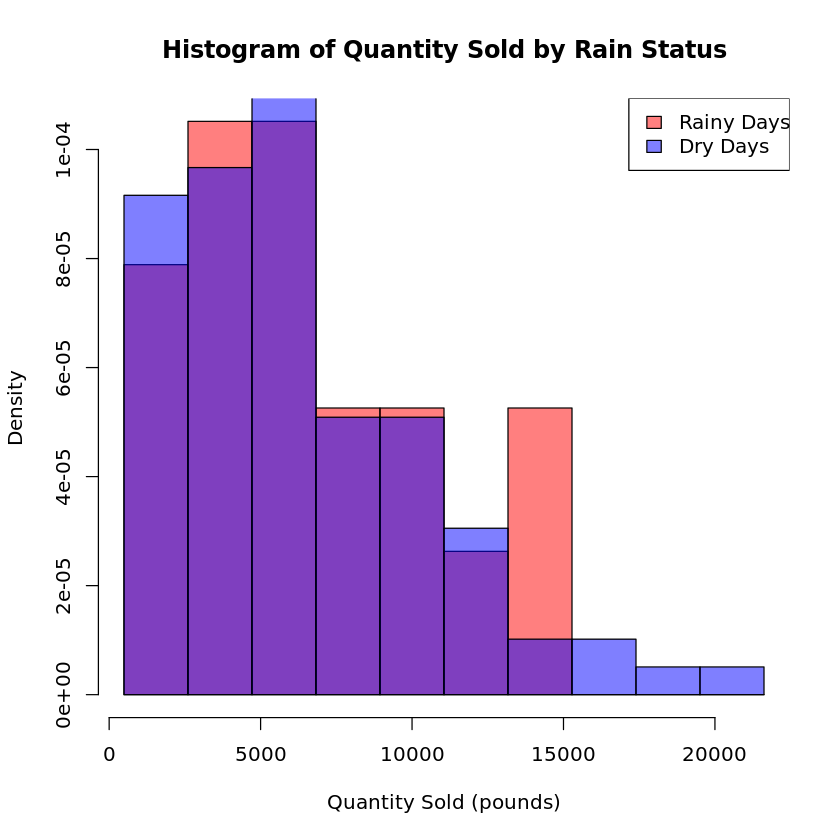

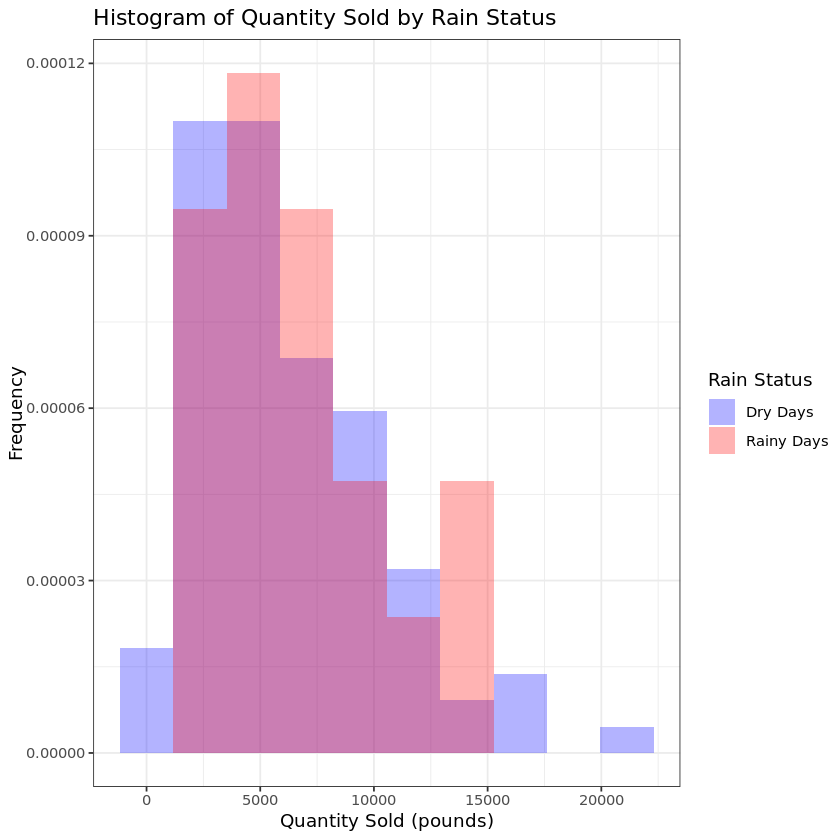

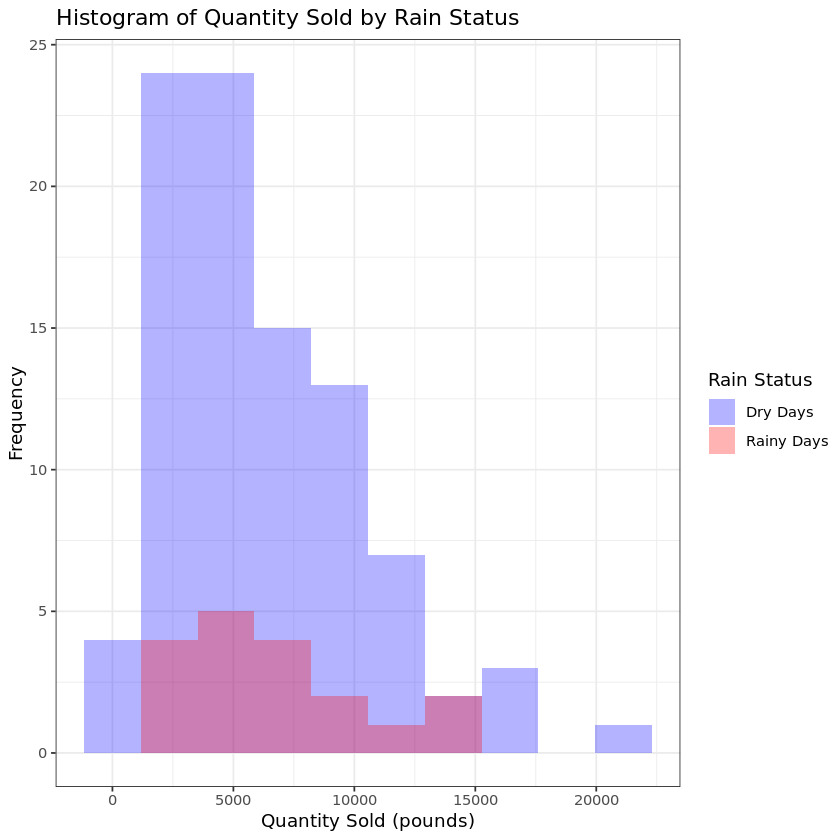

In [50]:
#### Notes: Full points for using either hist or ggplot,
#### And for showing frequencies or densities.

#### Example code using "hist" showing density
# Define shared breaks
hist_breaks <- seq(min(mydata$q), max(mydata$q), l = 10 + 1)

# Histogram for rainy days
hist(mydata$q[mydata$rainy == 1], 
     breaks = hist_breaks, 
     col = rgb(1, 0, 0, 0.5),
     main = 'Histogram of Quantity Sold by Rain Status', 
     xlab = 'Quantity Sold (pounds)',
     freq = FALSE)

# Histogram for non-rainy days + add = TRUE
hist(mydata$q[mydata$rainy == 0], 
     breaks = hist_breaks, 
     col = rgb(0, 0, 1, 0.5),
     freq = FALSE,
     add = TRUE)

# Add legend (optional)
legend('topright', legend = c('Rainy Days', 'Dry Days'), 
       fill = c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5)))

#### Example code using ggplot graphing density
ggplot(mydata, aes(x=q, y = ..density..)) +
    # set fill = rainy to stack separately for 0 and 1 observations
    geom_histogram(aes(fill = factor(rainy)),
        position = "identity",
        alpha = 0.3, 
        bins = 10) +
    # add labels
    labs(title = "Histogram of Quantity Sold by Rain Status",
        x = "Quantity Sold (pounds)",
        y = "Frequency") + 
    scale_fill_manual(name = "Rain Status", labels = c("Dry Days", "Rainy Days"),
    values = c("blue", "red")) +
    theme_bw()

#### Example code using ggplot graphing frequency
ggplot(mydata, aes(x=q)) +
    # set fill = rainy to stack separately for 0 and 1 observations
    geom_histogram(aes(fill = factor(rainy)),
        position = "identity",
        alpha = 0.3, 
        bins = 10) +
    # add labels
    labs(title = "Histogram of Quantity Sold by Rain Status",
        x = "Quantity Sold (pounds)",
        y = "Frequency") + 
    scale_fill_manual(name = "Rain Status", labels = c("Dry Days", "Rainy Days"),
    values = c("blue", "red")) +
    theme_bw()


**Answer:** When comparing densities, we observe that the distributions of quantities sold are descriptively similar between rainy and dry days. However, it appears that it is more likely to sell moderate quantitites of fish (4,000-8,000 pounds) on rainy days relative to dry days and more likely to sell extremely low (<1,000 pounds) or high (>15,000 pounds) quantitites of fish on dry days. That said, we should take these results with caution due to the low quantity of rainy days in the data.

### c) Comparisons of q for rainy and non-rainy days

#### i) Means of quantity

Calculate the mean of q between rainy- and non-rainy days and their standard errors. Compare the two means, do they seem substantially different?

Hint: Use the tidyverse (dplyr) method (after loading the appropriate package in the preamble):
filter() trims dataframe to observations with only rainy days and those with only non-rainy days


In [51]:
# Calculate means and se for rainy data
q_mean_rainy <- mean(rainy_data$q)
q_sd_rainy <- sd(rainy_data$q)
q_se_rainy <- q_sd_rainy/sqrt(n_rainy)

# Calculate means and se for non-rainy data
non_rainy_data <- filter(mydata, rainy == 0)
q_mean_non_rainy <- mean(non_rainy_data$q)
q_sd_non_rainy <- sd(non_rainy_data$q)
q_se_non_rainy <- q_sd_non_rainy/sqrt(n_non_rainy)

# Calculate difference
q_mean_diff <- q_mean_rainy - q_mean_non_rainy

# Print results
print(paste("The average quantity of fish sold on rainy days is", q_mean_rainy, 
    "with a standard error of", q_se_rainy, 
    "and the average quantity of fish sold on dry days is", q_mean_non_rainy,
    "with a standard error of", q_se_non_rainy,
    "so there is a difference of", q_mean_diff, 
    "pounds in the average quantity of fish sold between rainy and dry days"))


[1] "The average quantity of fish sold on rainy days is 6549.55541314019 with a standard error of 944.295912602072 and the average quantity of fish sold on dry days is 6293.07500892557 with a standard error of 421.715297857514 so there is a difference of 256.48040421462 pounds in the average quantity of fish sold between rainy and dry days"


**Answer:** The average quantity of fish sold in rainy days (6549.6 pounds) is 256.5 pounds higher than on non-rainy days (6293.1 pounds). This difference in quantities is about 4\% of the average quantity sold on dry days, which may or may not be economically meaningful depending on the context. However, this is only a descriptive difference, we do not know based on this information whether the difference is statistically significant. 

#### ii) Test Statistics

Create a test statistic for the difference of the mean of q between rainy- and non-rainy days. Use a two-tail test. Is the difference statistically significant at the 0.90 confidence level? 


In [52]:
# Perform two-sample t-test
diff_se <- sqrt((q_sd_rainy^2/n_rainy)+(q_sd_non_rainy^2/n_non_rainy))
t_stat <- q_mean_diff/diff_se
df <- n_rainy + n_non_rainy - 2
t_critical10<- qt(0.05, df, lower.tail=FALSE)
diff_se
df
# Print results
print(paste("Our test-statistic is", t_stat, "and the critical value at a 10% significant level is" , t_critical10))

[1] 1034.185

[1] 109

[1] "Our test-statistic is 0.248002446715177 and the critical value at a 10% significant level is 1.65895345820307"


**Answer:** Our Null Hypothesis is that there is no difference in quantities sold between rainy and dry days, and we test this against the alternative hypothesis that there is a significant difference in quantities sold between rainy and dry days:
$$H_0: \bar{X}_R - \bar{X}_D = D = 0$$
$$H_A: \bar{X}_R - \bar{X}_D = D \neq 0$$

Our test statistic for this hypothesis test is 
$$\frac{\hat{D} - D_0}{se(\hat{D})} = \frac{256.5 - 0}{\sqrt{\frac{s_R^2}{n_R} + \frac{s_D^2}{n_D}}} = \frac{256.5 - 0}{1034.1850} = 0.2480 $$

Our test statistic for a two-sided test of a difference in means with $\alpha = 0.10$ is distributed $t_{\alpha/2,n_1 + n_2 -2} = t_{.05,109}$ which gives us a critical value of $1.6590$.

Our decision rule is to reject the null hypothesis if $|test \ statistic| > |critical \ value|$. Since $|0.2480| < |1.6590|$ we **fail to reject** the null hypothesis in this case.

Interpretation: Based on the t-test, we fail to reject the null hypothesis at the 10% significance level, indicating that there is not enough evidence to conclude that there is a significant difference between the average quantities of fish sold on rainy days compared to non-rainy days.

## Question 2: Effect of price on quantity

In this part of the exercise, we will estimate the effect of log price on log of quantity sold each day. Consider the two following models:

Model (1): $q = \beta_0 + \beta_1 \ p   + u $

Model (2):  $q = \beta_0 + \beta_1 \ p + \beta_2 \ rainy + u $

**Correction:** It should be "we will estimate the effect of price on quantity sold each day".

### a) Estimation

Estimate equations (1) and (2) with `lm()`.

In [53]:
# Define model 1
model1 <- lm(q ~ p, data = mydata)

# Define model 2
model2 <- lm(q ~ p + rainy, data = mydata)

# Print summaries
summary(model1)
summary(model2)


Call:
lm(formula = q ~ p, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6158.2 -2945.3  -170.3  2150.8 13651.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9615       1039   9.257 2.12e-15 ***
p              -3709       1099  -3.376  0.00102 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3862 on 109 degrees of freedom
Multiple R-squared:  0.09465,	Adjusted R-squared:  0.08634 
F-statistic:  11.4 on 1 and 109 DF,  p-value: 0.001021



Call:
lm(formula = q ~ p + rainy, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6108.8 -2899.7  -424.6  2045.8 13699.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9570.1     1053.4   9.085 5.58e-15 ***
p            -3714.1     1103.5  -3.366  0.00106 ** 
rainy          307.2      998.7   0.308  0.75895    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3878 on 108 degrees of freedom
Multiple R-squared:  0.09544,	Adjusted R-squared:  0.07869 
F-statistic: 5.698 on 2 and 108 DF,  p-value: 0.004442


### b) Interpretation

Interpret each of the estimated parameters associated with the covariates (other than the constant) of Model (2) - as sign and size (for now, no need to talk about significance)

As an illustration, the estimated beta_0 is the predicted quantity sold when price is zero and it is not raining, holding all else constant.

**Answer:**

B0: The estimated quantity of fish sold is predicted to be 9,570 pounds when the price is 0 dollars per pound and it is not raining. However, this scenario is unrealistic as vendors are unlikely to give away their wares for free.

B1: A $1 per pound increase in price is associated with a 3,714 pound decrease in the quantity of fish sold, holding all else constant.

B2: The quantity of fish sold on a rainy day is predicted to increase by 307 pounds compared to a non-rainy day, holding all else constant.

### c) Omitted Variable Bias

How did your estimate of $\hat{\beta}_1$ change between equation (1) and equation (2)? Without performing any calculations, what information does this give you about the correlation between rainy days and price in the sample? (Explain your reasoning in no more than 4 sentences.)

**Answer:** The estimate of $\hat{\beta}_1$ changed from -3,709 in the under-specified model (model 1) to -3,714 in the fully specified model (model 2). This suggests that omitting the rainy variable introduced an upward bias. From our omitted variable bias formula we know that $$Sign(Bias) = Sign(\beta_{ov}) * Sign(\rho_{x,ov})$$
Since we see from our regression results that we have upward bias ($Sign(bias) > 0)$, and we see from our fully specified model (model 2) that the direct effect of rainy days on quantities sold is positive $\beta_{rainy} = 307.2 > 0$ ,we can conclude that prices and rain most be positively correlated ($\rho_{p,rainy} > 0$).

### d) Prediction

#### i) Predict the expected quantity sold, if it is a rainy day and price is equal to 2 using your estimates from Model (2).

In [54]:
# Extract coefficients
coefficients <- coef(model2)
beta_0 <- unname(coefficients[1])
beta_1 <- unname(coefficients[2])
beta_2 <- unname(coefficients[3])

# Calculate expected quantity
q_predicted_1 <- beta_0 + beta_1 * 2 + beta_2 * 1
q_predicted_1

[1] 2449.04

**Answer:** The predicted quantity of fish sold on a rainy day with a price of $2 per pound is 2449 pounds.

#### ii) Predict the expected quantity sold, if it is not a rainy day and price is equal to 2 using your estimates from Model (2).

In [55]:
# Calculate log(quantity) for a non-rainy day
q_predicted_2 <- beta_0 + beta_1 * 2 + beta_2 * 0

# Convert log(quantity) to quantity
q_predicted_2

[1] 2141.809

**Answer:** The predicted quantity of fish sold on a non-rainy day with a price of $2 per pound is 2142 pounds.

## Question 3: Hypothesis testing

### (a) Specify and estimate a model that allows you to test the following two hypotheses:


1) The windspeed does not affect the quantity of fish sold holding price, rain, and cold days constant.
   
2) A rainy day has the same effect on quantity sold than a cold day holding price and windspeed constant.


In [56]:
# Define model
model3 <- lm(q ~ p + rainy + cold + windspeed, data = mydata)

# Print summary
summary(model3)


Call:
lm(formula = q ~ p + rainy + cold + windspeed, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6409.8 -2874.0  -470.9  2131.0 13795.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11095.2     1830.1   6.062 2.09e-08 ***
p            -3104.1     1214.9  -2.555    0.012 *  
rainy          397.4     1005.6   0.395    0.694    
cold          -285.4      820.6  -0.348    0.729    
windspeed     -108.1      112.7  -0.959    0.340    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3887 on 106 degrees of freedom
Multiple R-squared:  0.1079,	Adjusted R-squared:  0.07428 
F-statistic: 3.207 on 4 and 106 DF,  p-value: 0.01579


### (b) Hypothesis 1

Given the estimated Model, what can you conclude about your first hypothesis? Use the five steps of hypothesis testing.



In [57]:
## Calculating the t critical value
# For alpha = .01
t_critical_a10 <- qt(0.05, 106, lower.tail=FALSE)
t_critical_a10
# For alpha = .05
t_critical_a5 <- qt(0.025, 106, lower.tail=FALSE)
t_critical_a5
# For alpha = .01
t_critical_a1 <- qt(0.005, 106, lower.tail=FALSE)
t_critical_a1

[1] 1.659356

[1] 1.982597

[1] 2.623008

**Answer:** 

Step 1: Define hypothesis

$H_0$: Windspeed has no effect on the quantity of fish sold, holding all else constant. ($\beta_{windspeed} = 0$)

$H_a$: Windspeed has an effect on the quantity of fish sold, holding all else constant. ($\beta_{windspeed} \neq 0$)

Step 2: Compute the test statistic

$t = \frac{\hat{\beta}_{windspeed}-\beta_0}{se(\hat{\beta})} = \frac{-108.1}{112.7} = -0.959$

Step 3: Choose significance level

We will use a 10% significance level, with a critical value of 1.66

Step 4: Define our rejection rule

If $|test \ statistic| > |critical \ value|$, we reject $H_0$. 

Step 5: Decide and interpret

Since $|-0.96| < 1.66$, we fail to reject the null hypothesis at a 90% confidence level. There is not enough evidence to conclude that windspeed affects the quantity of fish sold, holding price, rain, and cold days constant.

### (c) Omitting Windspeed

If you omit windspeed from the above model, what happens to the estimate of price? Why is that? explain with the omitted variable formula argument


In [58]:
# Define model
model4 <- lm(q ~ p + rainy + cold, data = mydata)

# Print summary
summary(model4)


Call:
lm(formula = q ~ p + rainy + cold, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6369.6 -2760.0  -404.7  2081.3 13511.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9666.7     1063.3   9.091 5.79e-15 ***
p            -3508.9     1138.9  -3.081  0.00262 ** 
rainy          377.5     1005.1   0.376  0.70798    
cold          -574.1      763.2  -0.752  0.45359    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3886 on 107 degrees of freedom
Multiple R-squared:  0.1002,	Adjusted R-squared:  0.07497 
F-statistic: 3.972 on 3 and 107 DF,  p-value: 0.009979


**Answer:** Again recall the omitted bias formula. $$Sign(Bias) = Sign(\beta_{ov}) * Sign(\rho_{x,ov})$$ When windspeed is omitted, the coefficient for the log of price decreases from -3104 to -3508, showing that omitting windspeed leads to **downward** omitted variable bias. Since we see that windspeed has a a direct negative effect on prices, this tells us that windspeed and price must be positively correlated. 

## Question 3

The data in the sample are for weekdays only, from Monday to Friday.
What would happen if you ran the following model?

 $q = \beta_0 + \beta_1 \ p + \beta_2 \ rainy + day1 \ \alpha_1 + day2 \ \alpha_2 + day3 \ \alpha_3 + day4 \ \alpha_4 + day5 \ \alpha_5 + u $

Please explain why that is.

In [59]:
# Define model
model5 <- lm(q ~ p + rainy + day1 + day2 + day3 + day4 + day5, data = mydata)

# Print summary
summary(model5)


Call:
lm(formula = q ~ p + rainy + day1 + day2 + day3 + day4 + day5, 
    data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6648.6 -2433.9  -436.1  2169.2 12128.9 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10572.5     1255.3   8.422 2.18e-13 ***
p            -3823.6     1047.3  -3.651 0.000411 ***
rainy          177.8      953.6   0.186 0.852427    
day1           616.3     1113.5   0.553 0.581153    
day2         -2401.1     1091.3  -2.200 0.030007 *  
day3         -2937.1     1106.6  -2.654 0.009198 ** 
day4           250.8     1084.6   0.231 0.817550    
day5              NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3654 on 104 degrees of freedom
Multiple R-squared:  0.2268,	Adjusted R-squared:  0.1822 
F-statistic: 5.085 on 6 and 104 DF,  p-value: 0.0001297


**Answer:** Adding all the weekday dummy variables would be an example of the dummy variable trap, which would introduce perfect collinearity since all these five variables together are linearly dependent. Indeed, we can see that when we try to estimate this model R automatically drops one of the dummy variables (day5). In order for this regression to work, we must omit at least one of these categories, which will become the reference group.

# THE END